# Homework 4

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
import pandas as pd

In [2]:
# пакет для проверки множественных гипотез
from statsmodels.stats.multitest import multipletests

In [3]:
text_size = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = text_size
plt.rcParams['ytick.labelsize'] = text_size
plt.rcParams['legend.fontsize'] = text_size
plt.rcParams['axes.titlesize'] = text_size
plt.rcParams['axes.labelsize'] = text_size
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = text_size

In [4]:
Data = pd.read_csv('sadiev.aa.csv')
Data.head(5)

,-1.801718228019206225e-01,-1.474314285732155061e-01,-1.691026466860834077e-01,-1.508084066565316794e+00,6.423804938499405592e-02
0,1.836084,-1.025085,1.222008,0.157703,0.196845
1,-1.077344,-0.847725,-1.268648,1.563516,-0.464249
2,-0.001584,-1.396146,-0.955532,-0.120022,0.761911
3,-0.700784,-0.075597,-0.478929,-0.607808,0.879374
4,-0.660996,0.289864,-0.426791,0.678446,0.309237


In [5]:
X = Data.values
y = np.array(Data.keys().values)
Z = np.zeros((X.shape[1], X.shape[0] + 1))
for i in range(len(y)):
    y[i] = float(y[i])
    Z[i] = np.append(y[i], X.T[i])
data = pd.DataFrame(Z.T)
data.sample(5)

,0,1,2,3,4
28,1.801688,-0.263294,-0.776881,-0.332281,1.010510
24,-0.416243,-1.097746,0.211753,2.763071,0.222040
5,-0.660996,0.289864,-0.426791,0.678446,0.309237
22,-1.205363,0.374196,0.592801,-1.309697,1.676608
16,1.910555,-0.323425,-0.223772,0.563887,-0.504189


In [6]:
X = data.values
X = X.T

## T-критерий Стьюдента (без поправок)

In [7]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j])[1])
    

In [8]:
N = m*(m - 1)//2
print('Количество проведений теста Стьюдента: {}'.format(N))

Количество проведений теста Стьюдента: 10


In [9]:
f = lambda x: x> 0.05
accepted = len(list(filter(f, p_values)))
print('accepted {}'.format(accepted))
print('rejected {}'.format(len(p_values) - accepted))

accepted 5
rejected 5


In [10]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j], equal_var = False)[1])

f = lambda x: x> 0.05
accepted = len(list(filter(f, p_values)))
print('accepted {}'.format(accepted))
print('rejected {}'.format(len(p_values) - accepted))

accepted 5
rejected 5


In [11]:
noncor = sorted(p_values)

## T-критерий Стьюдента (c поправками)

### 1. Бонферрони

In [12]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j], equal_var = False)[1])

rejections = multipletests(p_values, method='bonferroni')[0]
f = lambda x: x == False
accepted = len(list(filter(f, rejections)))
print('accepted {}'.format(accepted))
print('rejected {}'.format(len(p_values) - accepted))

accepted 8
rejected 2


In [13]:
alpha = multipletests(p_values, method='bonferroni', alpha = 0.05)[3]
print('Значение уровня значимости при введении поправки Бонферрони: {}'.format(alpha))

Значение уровня значимости при введении поправки Бонферрони: 0.005


In [14]:
bon = sorted(multipletests(p_values, method='bonferroni')[1])

### 2. Холма

In [15]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j], equal_var = False)[1])

rejections = multipletests(p_values, method='holm')[0]

f = lambda x: x == False
accepted = len(list(filter(f, rejections)))
print('accepted {}'.format(accepted))
print('rejected {}'.format(len(p_values) - accepted))

accepted 8
rejected 2


In [16]:
holm = sorted(multipletests(p_values, method='holm')[1])

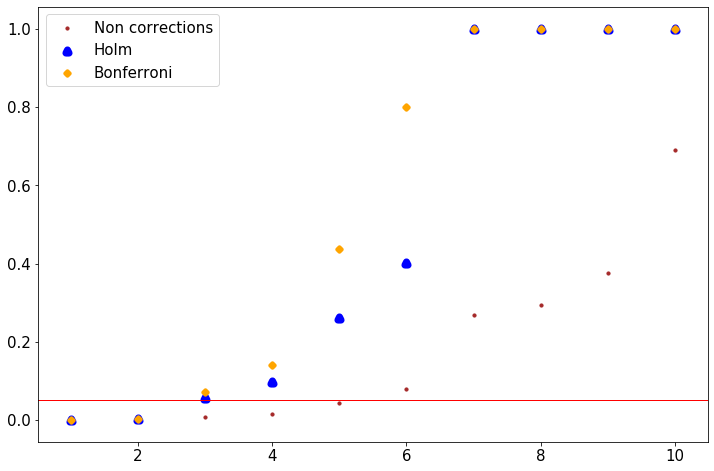

In [17]:
plt.scatter(range(1, N+1),noncor , s=N, color = 'brown', label = 'Non corrections')
plt.scatter(range(1, N+1), holm, s=N, color = 'blue', label = 'Holm',marker = "^", linewidths =7 )
plt.scatter(range(1, N+1), bon, s=N, color = 'orange', label = 'Bonferroni', marker = 'D', linewidths =4)
plt.axhline(y = 0.05, color = 'red', linewidth = 1)
plt.legend()
plt.show()

## Оценка количества верных гипотиз $m_0$ по методу Шведера-Спьётволла

In [18]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j])[1])
    

l = 0.5 
m0 = 1/(1 - l)*(1 + (np.array(p_values) > 0.5).sum())
m0

4.0